**SATYA RAYYIS BARUNA**

**1301213316**

**IF-45-07**

**TUGAS AKHIR**

**RANDOM FOREST FOR IDENTIFYING DIFFICULT QURAN VERSE**

**SAMPLING**

**✱ IMPORTING LIBRARY ✱**

In [ ]:
#Importing Library
import pandas as pd
import re
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
import string

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**✱ DATASET FROM TANZIL ✱**

In [ ]:
#Define the file path to access 'quran-simple-clean.txt' located in Google Drive.
#file_path = '/content/drive/My Drive/TugasAkhir/quran-simple-plain.xlsx'
file_path = '/content/quran-simple-plain.xlsx'

#Read the CSV file into a DataFrame using pandas
dataset = pd.read_excel(file_path)

print(dataset.head())

  surat    ayat                                       text
0      1     1.0   بِسْمِ اللَّهِ الرَّحْمَـٰنِ الرَّحِيمِ
1      1     2.0     الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ
2      1     3.0                  الرَّحْمَـٰنِ الرَّحِيمِ
3      1     4.0                   مَالِكِ يَوْمِ الدِّينِ
4      1     5.0  إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ


**✱ PREPROCESSING DATA ✱**

In [ ]:
#Data type
tipe_data_kolom = dataset.dtypes
print(tipe_data_kolom)

surat      object
 ayat     float64
 text      object
dtype: object


In [ ]:
#Change column names from the dataset
dataset.columns = ["sura", "aya", "text"]
dataset

,sura,aya,text
0,1,1.0,بِسْمِ اللَّهِ الرَّحْمَـٰنِ الرَّحِيمِ
1,1,2.0,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ
2,1,3.0,الرَّحْمَـٰنِ الرَّحِيمِ
3,1,4.0,مَالِكِ يَوْمِ الدِّينِ
4,1,5.0,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ
...,...,...,...
6261,# derived from or containing substantial po...,NaN,NaN
6262,#,NaN,NaN
6263,# Please check updates at: http://tanzil.net/...,NaN,NaN
6264,#,NaN,NaN


In [ ]:
#Replace the null value
dataset['aya'] = dataset['aya'].fillna(0)
dataset['aya'] = dataset['aya'].astype(int)
dataset

,sura,aya,text
0,1,1,بِسْمِ اللَّهِ الرَّحْمَـٰنِ الرَّحِيمِ
1,1,2,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ
2,1,3,الرَّحْمَـٰنِ الرَّحِيمِ
3,1,4,مَالِكِ يَوْمِ الدِّينِ
4,1,5,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ
...,...,...,...
6261,# derived from or containing substantial po...,0,NaN
6262,#,0,NaN
6263,# Please check updates at: http://tanzil.net/...,0,NaN
6264,#,0,NaN


In [ ]:
#Data type
tipe_data_kolom = dataset.dtypes
print(tipe_data_kolom)

sura    object
aya      int64
text    object
dtype: object


In [ ]:
#Menghapus kata "Bismillah" selain pada surat al-fatihah

# # Memuat dataset dari file Excel (XLSX)
# df = dataset
# Mengisi nilai NaN dengan string kosong
dataset['text'] = dataset['text'].fillna('')

# Iterasi melalui setiap baris dalam kolom 'text'
for i, text in enumerate(dataset['text']):
    # Jika bukan indeks pertama dan kata "Bismillah" ada dalam teks
    if i != 0 and 'بِسْمِ اللَّهِ الرَّحْمَـٰنِ الرَّحِيمِ' in text:
        # Menghapus kata "Bismillah" dari teks
        dataset.at[i, 'text'] = text.replace('بِسْمِ اللَّهِ الرَّحْمَـٰنِ الرَّحِيمِ', '')

# Tampilkan DataFrame yang sudah diubdf
dataset

,sura,aya,text
0,1,1,بِسْمِ اللَّهِ الرَّحْمَـٰنِ الرَّحِيمِ
1,1,2,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ
2,1,3,الرَّحْمَـٰنِ الرَّحِيمِ
3,1,4,مَالِكِ يَوْمِ الدِّينِ
4,1,5,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ
...,...,...,...
6261,# derived from or containing substantial po...,0,
6262,#,0,
6263,# Please check updates at: http://tanzil.net/...,0,
6264,#,0,


In [ ]:
from nltk.corpus import stopwords

data_real = []
data_proses = []
stopwords = set(stopwords.words('arabic'))

for text in dataset['text']:
  #Menghapus Angka
  proses = re.sub(r"\d+","",str(text))
  #Tokenisasi
  tokenize = nltk.word_tokenize(proses)

  #Stopword Removal
  filters = []
  real = []
  for token in tokenize:
    real.append(token)
    if token not in stopwords:
      filters.append(token)

  data_real.append(real)
  data_proses.append(filters)

dataset

,sura,aya,text
0,1,1,بِسْمِ اللَّهِ الرَّحْمَـٰنِ الرَّحِيمِ
1,1,2,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ
2,1,3,الرَّحْمَـٰنِ الرَّحِيمِ
3,1,4,مَالِكِ يَوْمِ الدِّينِ
4,1,5,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ
...,...,...,...
6261,# derived from or containing substantial po...,0,
6262,#,0,
6263,# Please check updates at: http://tanzil.net/...,0,
6264,#,0,


**✱ LABELING DATASET ✱**

dataset responden bagian 1

In [ ]:
file_path = '/content/responden.xlsx'

#Read the CSV file into a DataFrame using pandas
label = pd.read_excel(file_path)

label

,Timestamp,res1,res2,res3,jumlah mudah,hasil
0,Q.S Al-Fatihah Ayat 1,Mudah,Mudah,Mudah,3.0,Mudah
1,Q.S Al-Fatihah Ayat 2,Mudah,Mudah,Mudah,3.0,Mudah
2,Q.S Al-Fatihah Ayat 3,Mudah,Mudah,Mudah,3.0,Mudah
3,Q.S Al-Fatihah Ayat 4,Mudah,Mudah,Mudah,3.0,Mudah
4,Q.S Al-Fatihah Ayat 5,Mudah,Mudah,Mudah,3.0,Mudah
...,...,...,...,...,...,...
296,Q.S An-Naba Ayat 7,Mudah,Sulit,Mudah,2.0,Mudah
297,Q.S An-Naba Ayat 8,Mudah,Mudah,Mudah,3.0,Mudah
298,Q.S An-Naba Ayat 9,Mudah,Mudah,Mudah,3.0,Mudah
299,Q.S An-Naba Ayat 10,Mudah,Mudah,Mudah,3.0,Mudah


In [ ]:
label.drop(label.columns[[0,1,2,3,4]], axis=1, inplace=True)
label = label.drop(index=label.index[-1])
label

,hasil
0,Mudah
1,Mudah
2,Mudah
3,Mudah
4,Mudah
...,...
295,Mudah
296,Mudah
297,Mudah
298,Mudah


In [ ]:
label1 = dataset.iloc[0:10, 0:3]
label2 = dataset.iloc[148:158, 0:3]
label3 = dataset.iloc[259:269, 0:3]
label4 = dataset.iloc[385:395, 0:3]
label5 = dataset.iloc[516:526, 0:3]
label6 = dataset.iloc[640:650, 0:3]
label7 = dataset.iloc[750:760, 0:3]
label8 = dataset.iloc[899:909, 0:3]
label9 = dataset.iloc[1041:1051, 0:3]
label10 = dataset.iloc[1200:1210, 0:3]

label11 = dataset.iloc[1327:1337, 0:3]
label12 = dataset.iloc[1478:1488, 0:3]
label13 = dataset.iloc[1648:1658, 0:3]
label14 = dataset.iloc[1802:1812, 0:3]
label15 = dataset.iloc[2029:2039, 0:3]
label16 = dataset.iloc[2214:2224, 0:3]
label17 = dataset.iloc[2483:2493, 0:3]
label18 = dataset.iloc[2673:2683, 0:3]
label19 = dataset.iloc[2875:2885, 0:3]
label20 = dataset.iloc[3214:3224, 0:3]

label21 = dataset.iloc[3385:3395, 0:3]
label22 = dataset.iloc[3563:3573, 0:3]
label23 = dataset.iloc[3732:3742, 0:3]
label24 = dataset.iloc[4089:4099, 0:3]
label25 = dataset.iloc[4264:4274, 0:3]
label26 = dataset.iloc[4510:4520, 0:3]
label27 = dataset.iloc[4705:4715, 0:3]
label28 = dataset.iloc[5104:5114, 0:3]
label29 = dataset.iloc[5241:5251, 0:3]
label30 = dataset.iloc[5672:5682, 0:3]

In [ ]:
labellingdata = pd.concat([label1, label2, label3, label4, label5, label6, label7, label8, label9, label10, label11, label12, label13, label14, label15, label16, label17, label18, label19, label20, label21, label22, label23, label24, label25, label26, label27, label28, label29, label30], ignore_index=True)
labellingdata

,sura,aya,text
0,1,1,بِسْمِ اللَّهِ الرَّحْمَـٰنِ الرَّحِيمِ
1,1,2,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ
2,1,3,الرَّحْمَـٰنِ الرَّحِيمِ
3,1,4,مَالِكِ يَوْمِ الدِّينِ
4,1,5,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ
...,...,...,...
295,78,6,أَلَمْ نَجْعَلِ الْأَرْضَ مِهَادًا
296,78,7,وَالْجِبَالَ أَوْتَادًا
297,78,8,وَخَلَقْنَاكُمْ أَزْوَاجًا
298,78,9,وَجَعَلْنَا نَوْمَكُمْ سُبَاتًا


In [ ]:
df_a = pd.DataFrame(labellingdata)

df_b = pd.DataFrame(label)

# Menggabungkan kedua tabel menggunakan pd.concat()
dataset1 = pd.concat([df_a, df_b], axis=1)

dataset1

,sura,aya,text,hasil
0,1,1,بِسْمِ اللَّهِ الرَّحْمَـٰنِ الرَّحِيمِ,Mudah
1,1,2,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ,Mudah
2,1,3,الرَّحْمَـٰنِ الرَّحِيمِ,Mudah
3,1,4,مَالِكِ يَوْمِ الدِّينِ,Mudah
4,1,5,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ,Mudah
...,...,...,...,...
295,78,6,أَلَمْ نَجْعَلِ الْأَرْضَ مِهَادًا,Mudah
296,78,7,وَالْجِبَالَ أَوْتَادًا,Mudah
297,78,8,وَخَلَقْنَاكُمْ أَزْوَاجًا,Mudah
298,78,9,وَجَعَلْنَا نَوْمَكُمْ سُبَاتًا,Mudah


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Label' column
dataset1['hasil_numerik'] = label_encoder.fit_transform(dataset1['hasil'])

# Print the transformed labels
dataset1

,sura,aya,text,hasil,hasil_numerik
0,1,1,بِسْمِ اللَّهِ الرَّحْمَـٰنِ الرَّحِيمِ,Mudah,0
1,1,2,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ,Mudah,0
2,1,3,الرَّحْمَـٰنِ الرَّحِيمِ,Mudah,0
3,1,4,مَالِكِ يَوْمِ الدِّينِ,Mudah,0
4,1,5,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ,Mudah,0
...,...,...,...,...,...
295,78,6,أَلَمْ نَجْعَلِ الْأَرْضَ مِهَادًا,Mudah,0
296,78,7,وَالْجِبَالَ أَوْتَادًا,Mudah,0
297,78,8,وَخَلَقْنَاكُمْ أَزْوَاجًا,Mudah,0
298,78,9,وَجَعَلْنَا نَوْمَكُمْ سُبَاتًا,Mudah,0


dataset responden bagian 2

In [ ]:
#Define the file path to access
file_path = '/content/new-label.xlsx'

#Read the CSV file into a DataFrame using pandas
dataset2 = pd.read_excel(file_path)

dataset2

,sura,aya,text,newlabel,hasil_numerik
0,2,8,وَمِنَ النَّاسِ مَنْ يَقُولُ آمَنَّا بِاللَّهِ...,Mudah,0
1,2,25,وَبَشِّرِ الَّذِينَ آمَنُوا وَعَمِلُوا الصَّال...,Mudah,0
2,2,32,قَالُوا سُبْحَانَكَ لَا عِلْمَ لَنَا إِلَّا مَ...,Mudah,0
3,2,48,وَاتَّقُوا يَوْمًا لَا تَجْزِي نَفْسٌ عَنْ نَف...,Sulit,1
4,2,83,وَإِذْ أَخَذْنَا مِيثَاقَ بَنِي إِسْرَائِيلَ ل...,Mudah,0
...,...,...,...,...,...
320,98,7,إِنَّ الَّذِينَ آمَنُوا وَعَمِلُوا الصَّالِحَا...,Mudah,0
321,99,8,وَمَنْ يَعْمَلْ مِثْقَالَ ذَرَّةٍ شَرًّا يَرَهُ,Mudah,0
322,101,3,وَمَا أَدْرَاكَ مَا الْقَارِعَةُ,Mudah,0
323,107,2,فَذَٰلِكَ الَّذِي يَدُعُّ الْيَتِيمَ,Mudah,0


In [ ]:
dataset2.columns = ['sura', 'aya', 'text', 'hasil', 'hasil_numerik']
dataset2

,sura,aya,text,hasil,hasil_numerik
0,2,8,وَمِنَ النَّاسِ مَنْ يَقُولُ آمَنَّا بِاللَّهِ...,Mudah,0
1,2,25,وَبَشِّرِ الَّذِينَ آمَنُوا وَعَمِلُوا الصَّال...,Mudah,0
2,2,32,قَالُوا سُبْحَانَكَ لَا عِلْمَ لَنَا إِلَّا مَ...,Mudah,0
3,2,48,وَاتَّقُوا يَوْمًا لَا تَجْزِي نَفْسٌ عَنْ نَف...,Sulit,1
4,2,83,وَإِذْ أَخَذْنَا مِيثَاقَ بَنِي إِسْرَائِيلَ ل...,Mudah,0
...,...,...,...,...,...
320,98,7,إِنَّ الَّذِينَ آمَنُوا وَعَمِلُوا الصَّالِحَا...,Mudah,0
321,99,8,وَمَنْ يَعْمَلْ مِثْقَالَ ذَرَّةٍ شَرًّا يَرَهُ,Mudah,0
322,101,3,وَمَا أَدْرَاكَ مَا الْقَارِعَةُ,Mudah,0
323,107,2,فَذَٰلِكَ الَّذِي يَدُعُّ الْيَتِيمَ,Mudah,0


In [ ]:
df_concat = pd.concat([dataset1, dataset2], axis=0, ignore_index=True)

# Menampilkan DataFrame hasil gabungan
df_concat

,sura,aya,text,hasil,hasil_numerik
0,1,1,بِسْمِ اللَّهِ الرَّحْمَـٰنِ الرَّحِيمِ,Mudah,0
1,1,2,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ,Mudah,0
2,1,3,الرَّحْمَـٰنِ الرَّحِيمِ,Mudah,0
3,1,4,مَالِكِ يَوْمِ الدِّينِ,Mudah,0
4,1,5,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ,Mudah,0
...,...,...,...,...,...
620,98,7,إِنَّ الَّذِينَ آمَنُوا وَعَمِلُوا الصَّالِحَا...,Mudah,0
621,99,8,وَمَنْ يَعْمَلْ مِثْقَالَ ذَرَّةٍ شَرًّا يَرَهُ,Mudah,0
622,101,3,وَمَا أَدْرَاكَ مَا الْقَارِعَةُ,Mudah,0
623,107,2,فَذَٰلِكَ الَّذِي يَدُعُّ الْيَتِيمَ,Mudah,0


**✱ DATASET INFO ✱**

In [ ]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sura           625 non-null    object
 1   aya            625 non-null    int64 
 2   text           625 non-null    object
 3   hasil          625 non-null    object
 4   hasil_numerik  625 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 24.5+ KB


In [ ]:
df_concat.describe()

,aya,hasil_numerik
count,625.000000,625.000000
mean,55.665600,0.326400
std,53.987462,0.469271
min,1.000000,0.000000
25%,12.000000,0.000000
50%,40.000000,0.000000
75%,82.000000,1.000000
max,272.000000,1.000000


In [ ]:
df_concat.isna().sum()

,0
sura,0
aya,0
text,0
hasil,0
hasil_numerik,0


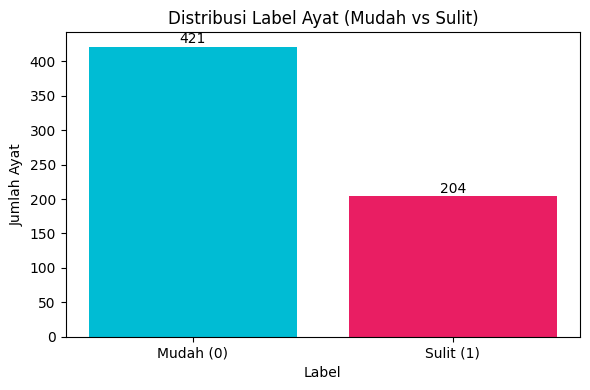

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah label
label_counts = df_concat['hasil'].value_counts().sort_index()

# Siapkan data
labels = ['Mudah (0)', 'Sulit (1)']
counts = label_counts.values
colors = ['#00BCD4', '#E91E63']  # biru dan oranye

# Plot batang manual
plt.figure(figsize=(6, 4))
bars = plt.bar(labels, counts, color=colors)

# Tambahkan nilai di atas bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, str(yval), ha='center', va='bottom', fontsize=10)

# Tambahkan judul dan label sumbu
plt.title('Distribusi Label Ayat (Mudah vs Sulit)', fontsize=12)
plt.xlabel('Label', fontsize=10)
plt.ylabel('Jumlah Ayat', fontsize=10)

plt.tight_layout()
plt.show()


**✱ Term Frequency-Inverse Document Frequency ✱**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
# Data preparation
datatrain = df_concat['text']
datalabel = df_concat['hasil_numerik']

print("=== DATA OVERVIEW ===")
print(f"Total data: {len(datatrain)}")
print(f"Label distribution:")
print(df_concat['hasil'].value_counts())
print(f"Label distribution (numeric):")
print(df_concat['hasil_numerik'].value_counts())

=== DATA OVERVIEW ===
Total data: 625
Label distribution:
hasil
Mudah    421
Sulit    204
Name: count, dtype: int64
Label distribution (numeric):
hasil_numerik
0    421
1    204
Name: count, dtype: int64


In [ ]:
# TF-IDF Vectorization
print("\n=== TF-IDF TRANSFORMATION ===")
tfidf_transformer = TfidfVectorizer()
X_tfidf = tfidf_transformer.fit_transform(datatrain)
print(f"TF-IDF shape: {X_tfidf.shape}")
print(f"Feature names sample: {tfidf_transformer.get_feature_names_out()[:10]}")


=== TF-IDF TRANSFORMATION ===
TF-IDF shape: (625, 114)
Feature names sample: ['آب' 'آت' 'آث' 'آخ' 'آذ' 'آس' 'آف' 'آل' 'آلل' 'آم']


**✱ DATA SPLITTING ✱**

In [ ]:
# Data Splitting
print("\n=== DATA SPLITTING ===")
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, datalabel,
    test_size=0.25,
    random_state=115,
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Training label distribution: {np.bincount(y_train)}")
print(f"Test label distribution: {np.bincount(y_test)}")



=== DATA SPLITTING ===
Training set size: (468, 114)
Test set size: (157, 114)
Training label distribution: [311 157]
Test label distribution: [110  47]


**✱ HANDLING IMBALANCED DATA TECHNIQUE ✱**

In [ ]:
# ===============================
# HANDLING IMBALANCED DATA
# ===============================

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

print("\n=== HANDLING IMBALANCED DATA (RUS + SMOTE) ===")

# Undersampling kelas mayoritas (label 'mudah')
rus = RandomUnderSampler(random_state=42, sampling_strategy='majority')
X_rus, y_rus = rus.fit_resample(X_train, y_train)
print(f"Setelah Random Undersampling: {np.bincount(y_rus)}")

# Oversampling kelas minoritas (label 'sulit') dengan SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_rus, y_rus)
print(f"Setelah SMOTE: {np.bincount(y_balanced)}")


=== HANDLING IMBALANCED DATA (RUS + SMOTE) ===
Setelah Random Undersampling: [157 157]
Setelah SMOTE: [157 157]


In [ ]:
# ========================================
# VERSION SAMPLING
# ========================================
print("\n" + "="*50)
print("                 VERSION SAMPLING")
print("="*50)

# Random Forest - with sampling
print("\n=== RANDOM FOREST - sampling ===")
rf_model = RandomForestClassifier(
    n_estimators=100,        # Jumlah pohon terbaik dari GridSearch
    max_depth=15,            # Kedalaman maksimum terbaik
    max_features='log2',     # Fitur terbaik untuk split
    random_state=115,         # Untuk reprodusibilitas
    n_jobs=-1                # Gunakan semua core CPU
)

print("Melatih model Random Forest...")
rf_model.fit(X_balanced, y_balanced)

# Prediksi pada data testing
y_pred = rf_model.predict(X_test)

# Evaluasi model
print("\n" + "="*50)
print("        HASIL EVALUASI MODEL RANDOM FOREST")
print("="*50)

# Classification Report
class_report = classification_report(y_test, y_pred, digits=4)
print('Classification Report:')
print(class_report)

# Metrik evaluasi
acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred, average='weighted')
rec_score = recall_score(y_test, y_pred, average='weighted')
f1_score_weighted = f1_score(y_test, y_pred, average='weighted')

print(f'\nAkurasi: {acc_score:.4f}')
print(f'Precision (weighted): {prec_score:.4f}')
print(f'Recall (weighted): {rec_score:.4f}')
print(f'F1-Score (weighted): {f1_score_weighted:.4f}')



                 VERSION SAMPLING

=== RANDOM FOREST - sampling ===
Melatih model Random Forest...

        HASIL EVALUASI MODEL RANDOM FOREST
Classification Report:
              precision    recall  f1-score   support

           0     0.8046    0.6364    0.7107       110
           1     0.4286    0.6383    0.5128        47

    accuracy                         0.6369       157
   macro avg     0.6166    0.6373    0.6117       157
weighted avg     0.6920    0.6369    0.6514       157


Akurasi: 0.6369
Precision (weighted): 0.6920
Recall (weighted): 0.6369
F1-Score (weighted): 0.6514



Confusion Matrix:
[[70 40]
 [17 30]]


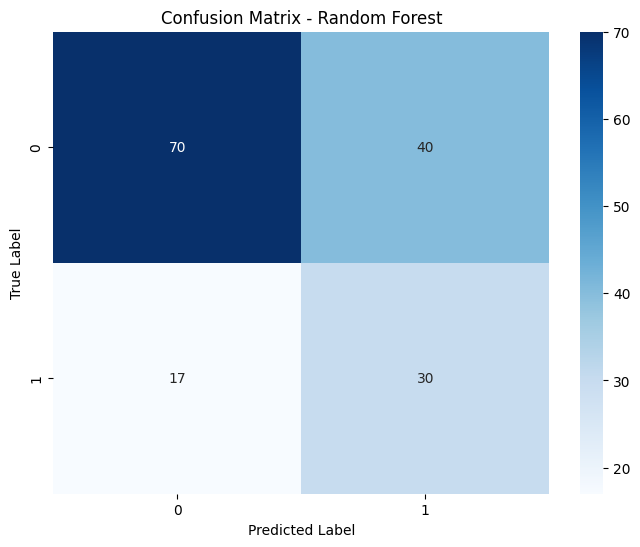

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f'\nConfusion Matrix:')
print(cm)
# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(len(np.unique(datalabel))),
            yticklabels=range(len(np.unique(datalabel))))
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()